In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

In [2]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [5]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

# EPS: 0.1

# LINEAR

Training first model ... 


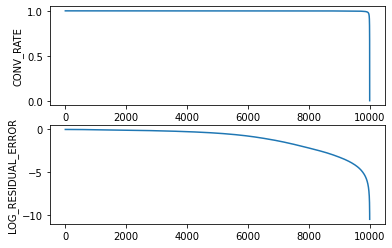

Fit time: 269.02652621269226, #SV: 1218
SUM OF eps-LOSS: 22089.18889137231
DEVSET MEE: 3.480589901225173


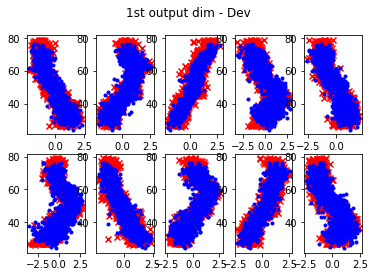

Testing the model
SUM OF eps-LOSS: 5735.896624794044
TEST MEE: 3.5910713745593568


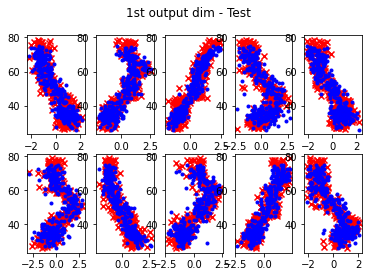

In [4]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


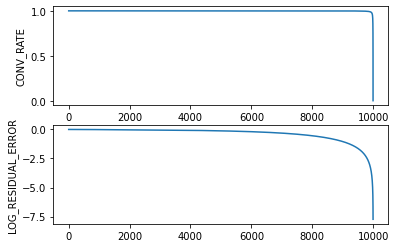

Fit time: 269.3090007305145, #SV: 1214
SUM OF eps-LOSS: 21931.66177818664
DEVSET MEE: 3.4697817622764977


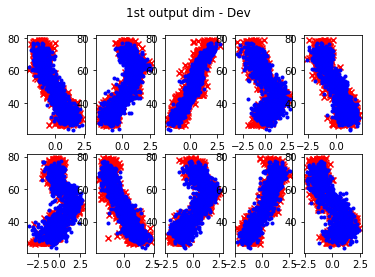

Testing the model
SUM OF eps-LOSS: 5780.896935620497
TEST MEE: 3.5890373085931935


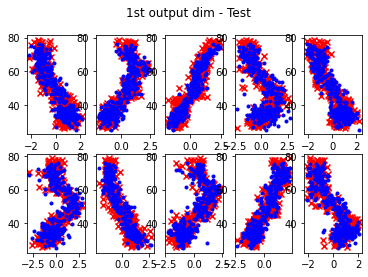

In [5]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


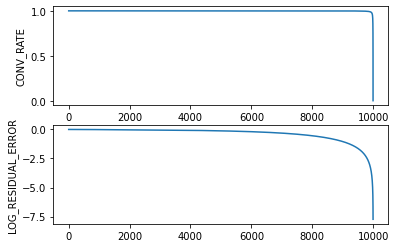

Fit time: 275.2242283821106, #SV: 1214
SUM OF eps-LOSS: 21931.661778186324
DEVSET MEE: 3.469781762276502


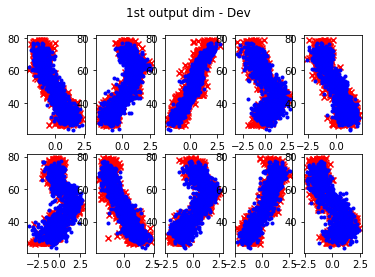

Testing the model
SUM OF eps-LOSS: 5780.896935620622
TEST MEE: 3.589037308593307


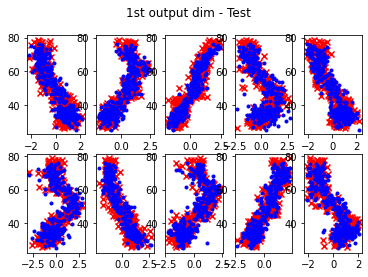

In [6]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [7]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

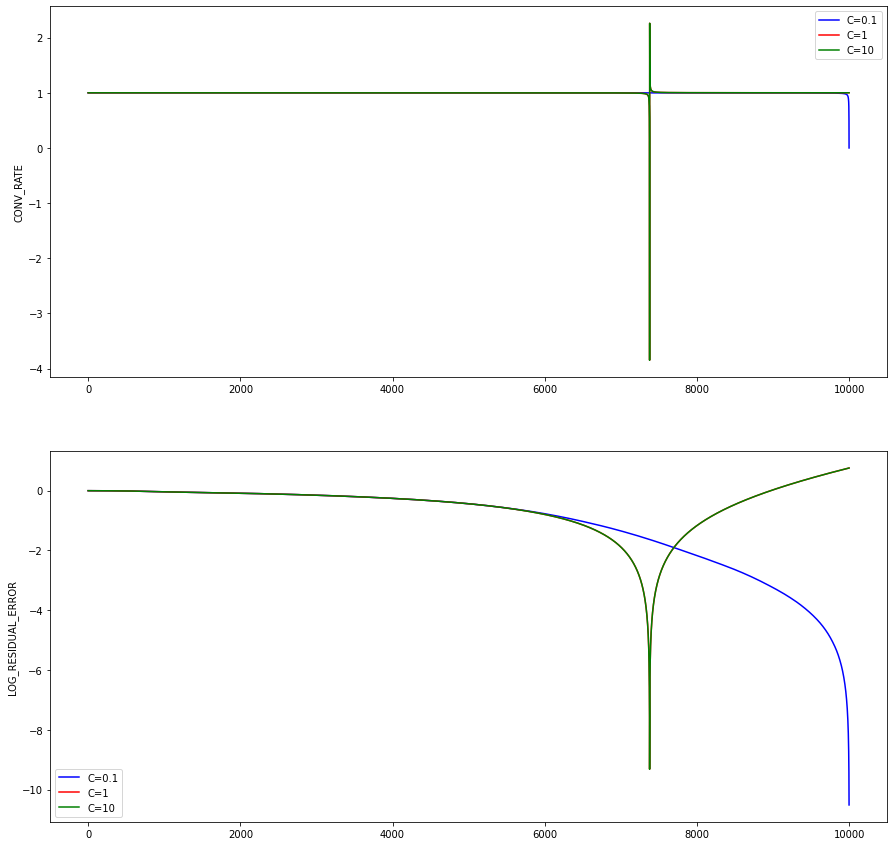

In [8]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_01_0, lin_01_1, lin_01_2 = cup_model, cup_model, cup_model2


In [9]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-420.612417266642,
 -1319.0945575577439,
 -1319.094557557827,
 array([0.9116222 , 0.91095551, 0.91095551]))

# POLY

Training first model ... 


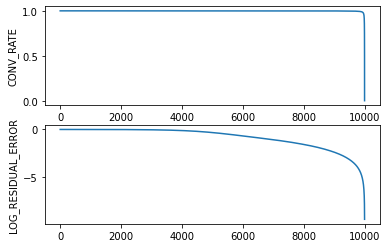

Fit time: 288.486136674881, #SV: 1218
SUM OF eps-LOSS: 27513.914913394783
DEVSET MEE: 3.491402052139873


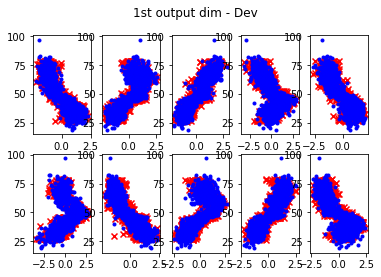

Testing the model
SUM OF eps-LOSS: 6414.908020386324
TEST MEE: 3.480774893691303


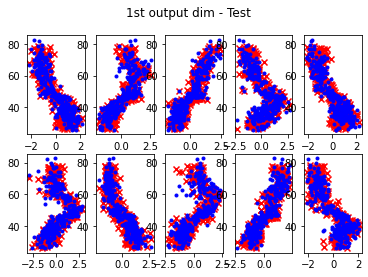

In [10]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


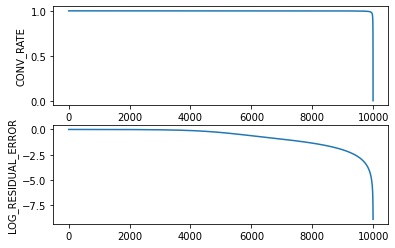

Fit time: 286.0645909309387, #SV: 1220
SUM OF eps-LOSS: 26421.704336118895
DEVSET MEE: 3.406374305315716


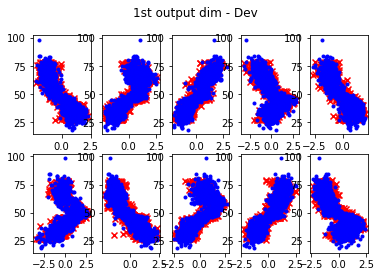

Testing the model
SUM OF eps-LOSS: 6162.937870388666
TEST MEE: 3.423352520254827


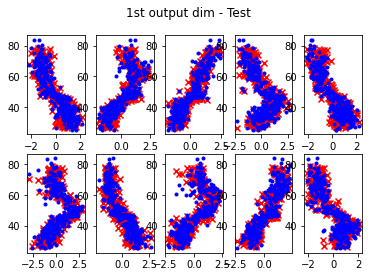

In [11]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


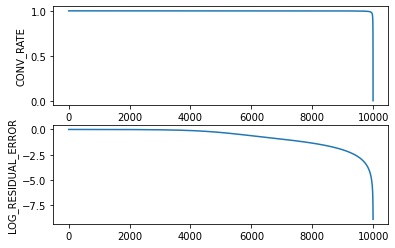

Fit time: 291.75663805007935, #SV: 1220
SUM OF eps-LOSS: 26421.70433611833
DEVSET MEE: 3.4063743053156523


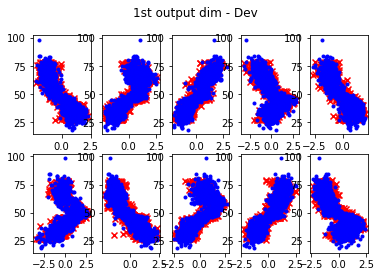

Testing the model
SUM OF eps-LOSS: 6162.937870388543
TEST MEE: 3.4233525202547654


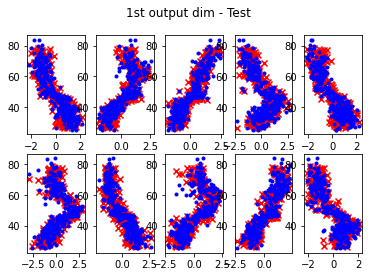

In [12]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [13]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

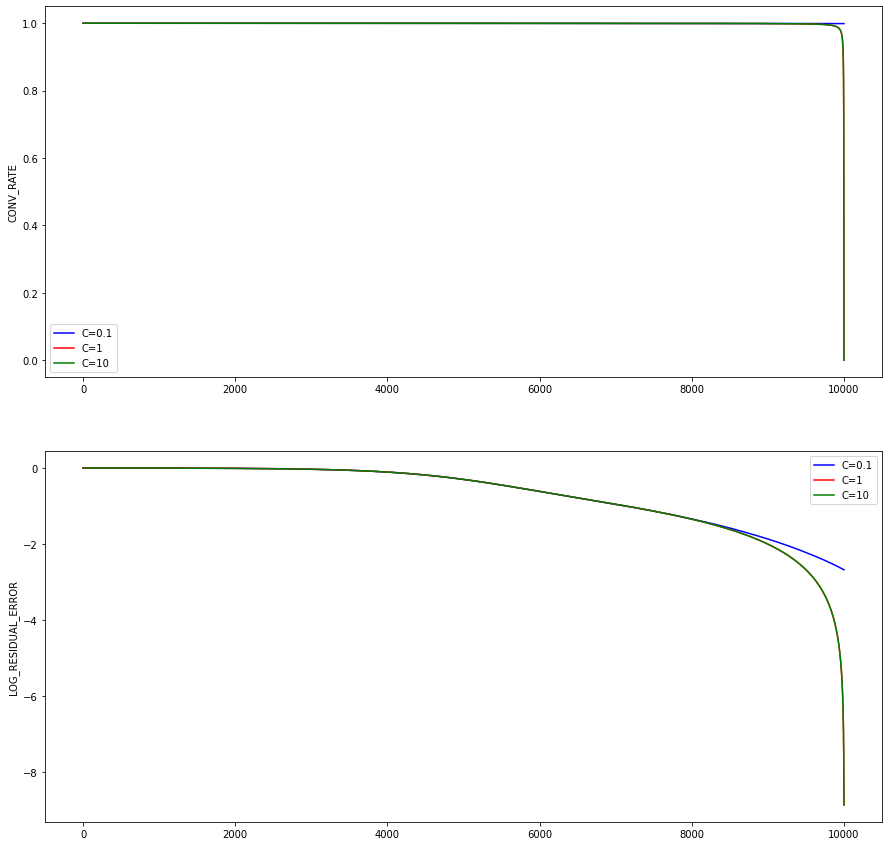

In [14]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_01_0, poly_01_1, poly_01_2 = cup_model, cup_model, cup_model2

In [15]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-468.35794171212774,
 -502.7861653468876,
 -502.78616534683096,
 array([0.90163792, 0.9054318 , 0.9054318 ]))

# SIGMOID

Training first model ... 


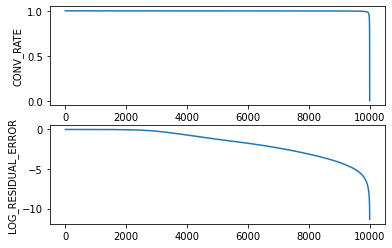

Fit time: 284.4166238307953, #SV: 1216
SUM OF eps-LOSS: 42227.49683476433
DEVSET MEE: 4.601858114742052


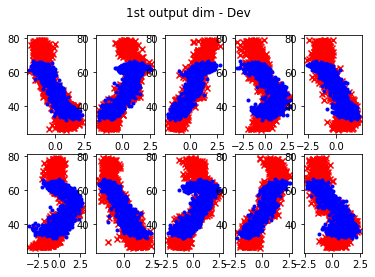

Testing the model
SUM OF eps-LOSS: 10273.432102204595
TEST MEE: 4.629796366639543


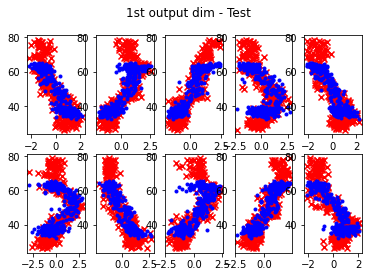

In [16]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


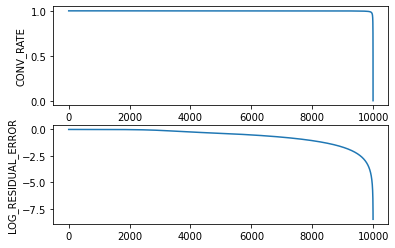

Fit time: 293.8950021266937, #SV: 1219
SUM OF eps-LOSS: 24881.51053052784
DEVSET MEE: 3.757891022762532


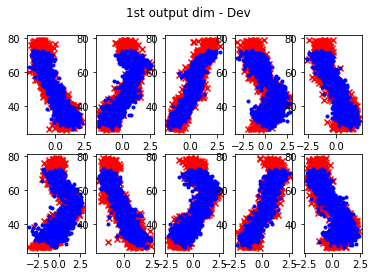

Testing the model
SUM OF eps-LOSS: 6465.214116115938
TEST MEE: 3.8698613834549125


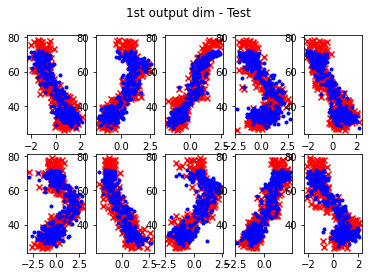

In [17]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


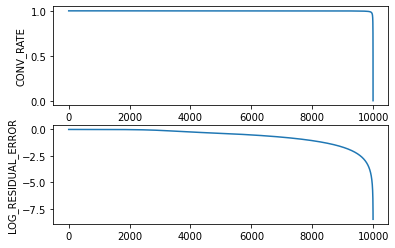

Fit time: 289.42741870880127, #SV: 1219
SUM OF eps-LOSS: 24881.51053052897
DEVSET MEE: 3.7578910227626214


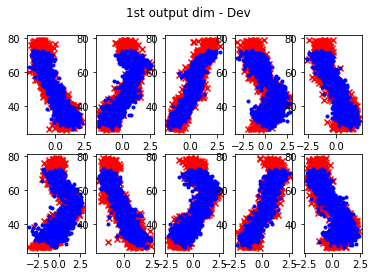

Testing the model
SUM OF eps-LOSS: 6465.214116116266
TEST MEE: 3.869861383455048


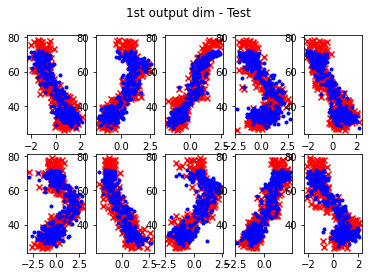

In [18]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [19]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

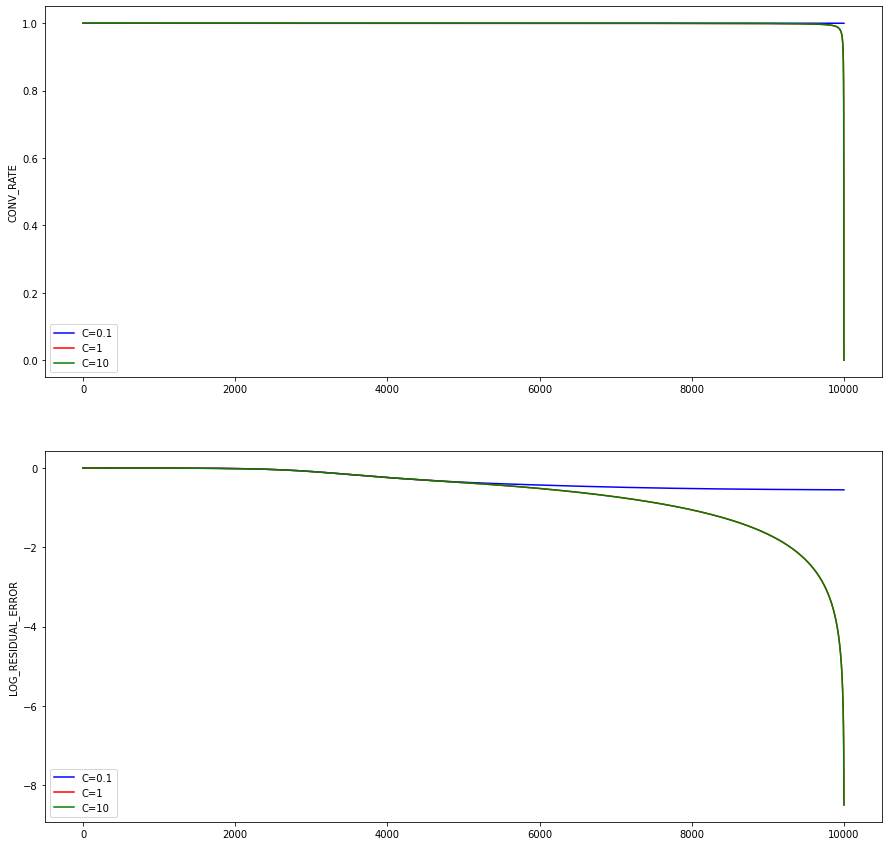

In [20]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_01_0, sig_01_1, sig_01_2 = cup_model, cup_model, cup_model2

In [21]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-730.7541615682989,
 -1726.3086569261482,
 -1726.3086569257773,
 array([0.84329983, 0.90053958, 0.90053958]))

# RBF

Training first model ... 


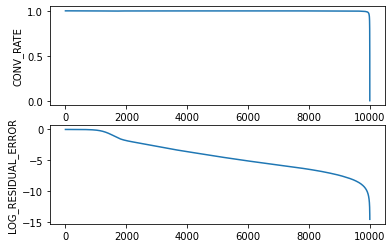

Fit time: 262.4355592727661, #SV: 1211
SUM OF eps-LOSS: 28407.860501268387
DEVSET MEE: 3.5631228213785553


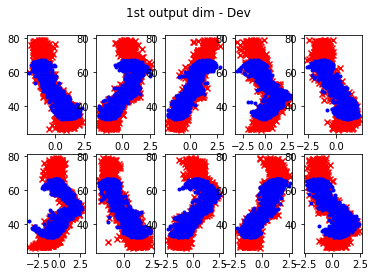

Testing the model
SUM OF eps-LOSS: 6710.081989635015
TEST MEE: 3.480236487549521


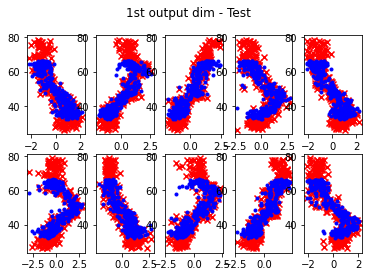

In [22]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


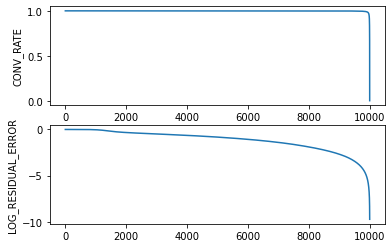

Fit time: 293.1660883426666, #SV: 1220
SUM OF eps-LOSS: 6927.320517183713
DEVSET MEE: 1.8731717846202847


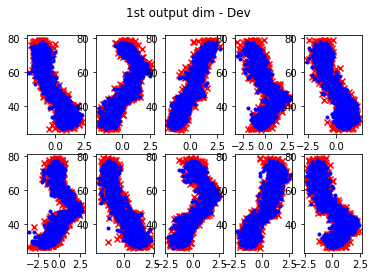

Testing the model
SUM OF eps-LOSS: 1951.6156201270558
TEST MEE: 1.9622113059548554


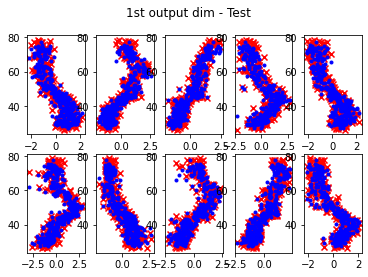

In [23]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


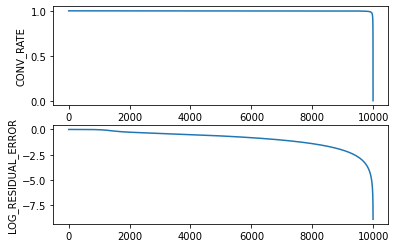

Fit time: 277.534996509552, #SV: 1219
SUM OF eps-LOSS: 6437.373458342441
DEVSET MEE: 1.8338311616593632


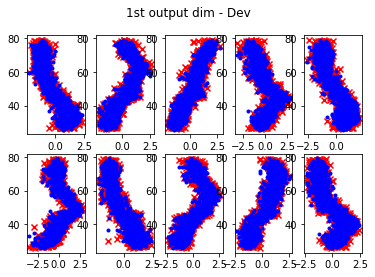

Testing the model
SUM OF eps-LOSS: 1900.228700421256
TEST MEE: 1.9496214745329332


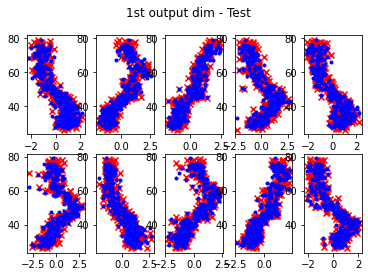

In [24]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [25]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

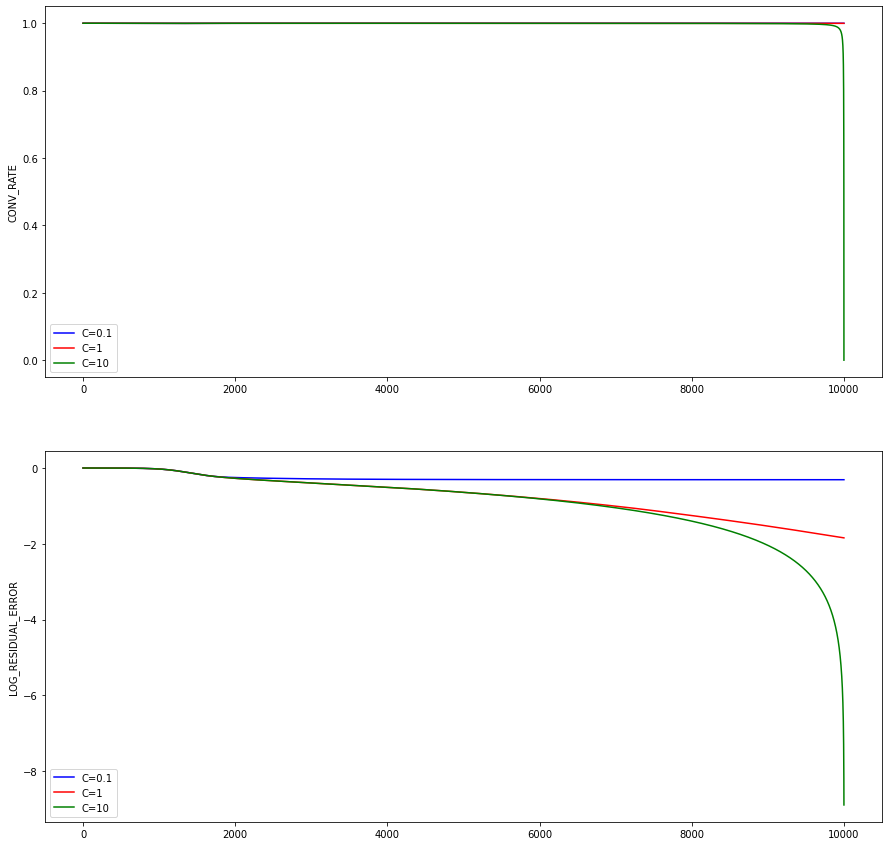

In [26]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_01_0, rbf_01_1, rbf_01_2 = cup_model, cup_model, cup_model2

In [27]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-759.9427610113544,
 -2406.767012081503,
 -2858.5761256312853,
 array([0.89725481, 0.96929047, 0.97006524]))

# EPS: 0.5

# LINEAR

Training first model ... 


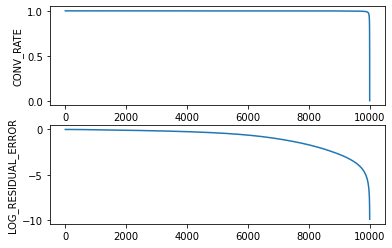

Fit time: 271.56199860572815, #SV: 1203
SUM OF eps-LOSS: 22214.749639021567
DEVSET MEE: 3.4877483921642183


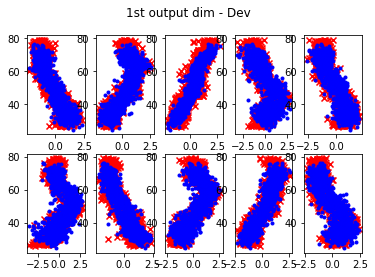

Testing the model
SUM OF eps-LOSS: 5737.208497210308
TEST MEE: 3.58814573635117


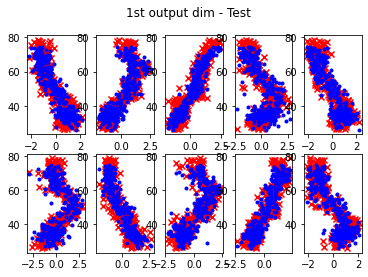

In [28]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


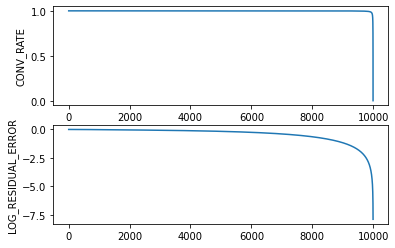

Fit time: 270.58700013160706, #SV: 1205
SUM OF eps-LOSS: 21932.783200678005
DEVSET MEE: 3.4716158745307997


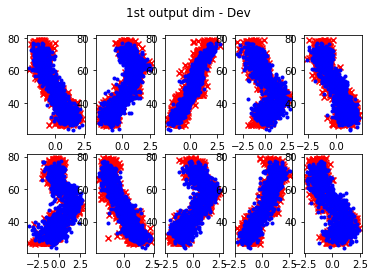

Testing the model
SUM OF eps-LOSS: 5785.722800488092
TEST MEE: 3.593330990606237


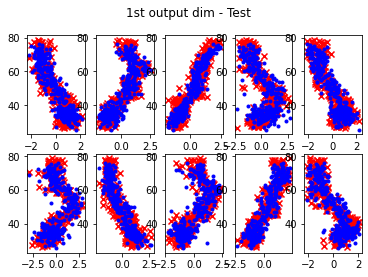

In [29]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


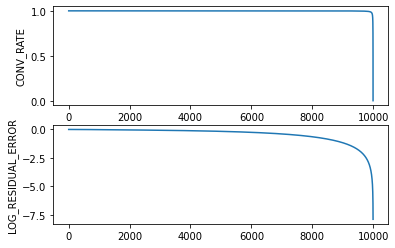

Fit time: 270.4929871559143, #SV: 1205
SUM OF eps-LOSS: 21932.783200678325
DEVSET MEE: 3.4716158745308086


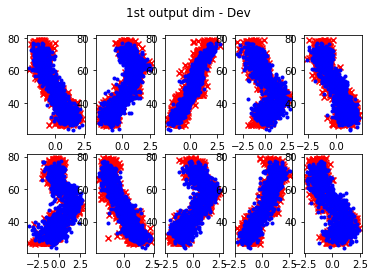

Testing the model
SUM OF eps-LOSS: 5785.7228004879435
TEST MEE: 3.5933309906061144


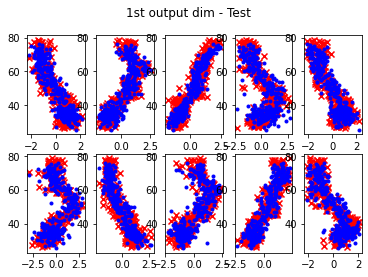

In [30]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [31]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

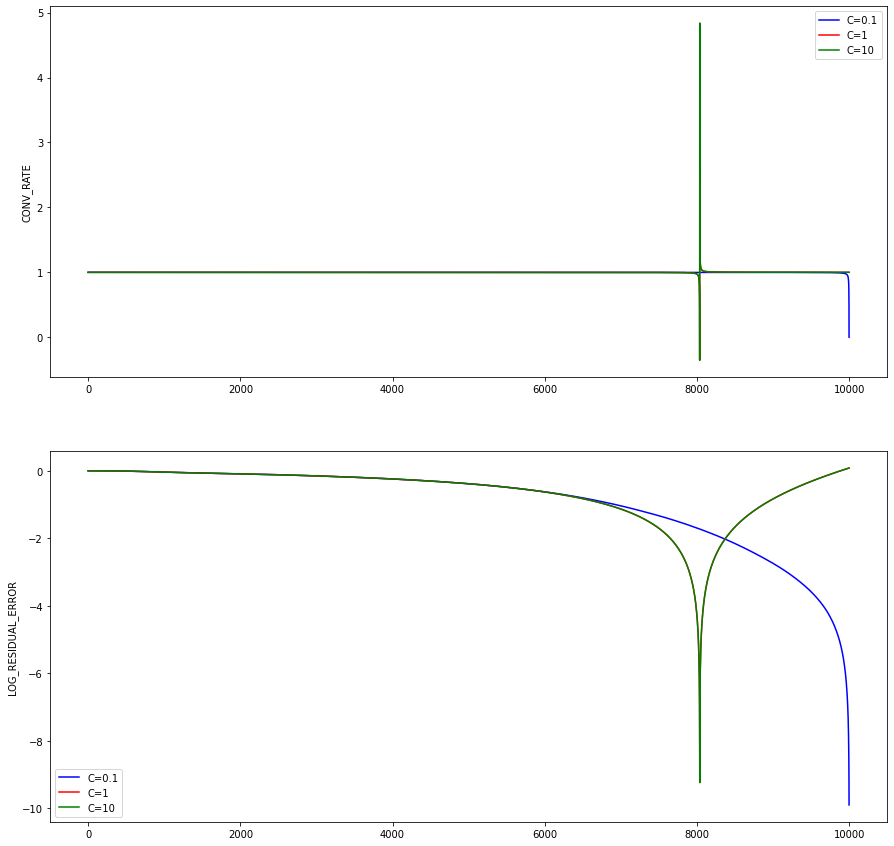

In [32]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()
lin_05_0, lin_05_1, lin_05_2 = cup_model, cup_model, cup_model2


In [33]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-359.05841615991994,
 -748.9768908799184,
 -748.9768908795756,
 array([0.91160528, 0.91088006, 0.91088006]))

# POLY

Training first model ... 


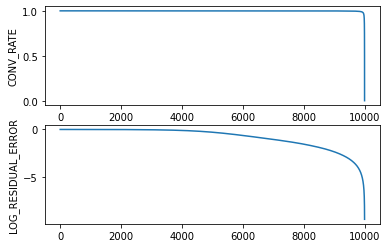

Fit time: 271.1210026741028, #SV: 1200
SUM OF eps-LOSS: 28107.018692607573
DEVSET MEE: 3.540656309250961


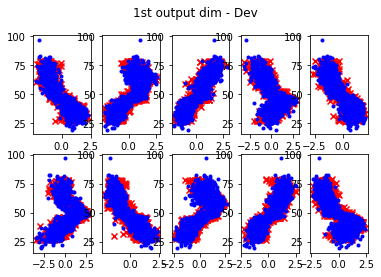

Testing the model
SUM OF eps-LOSS: 6576.411716574811
TEST MEE: 3.5245022730475104


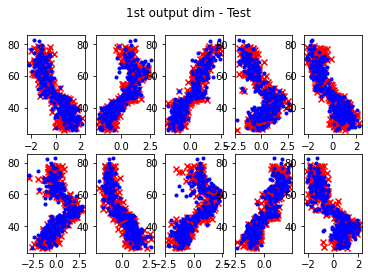

In [34]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


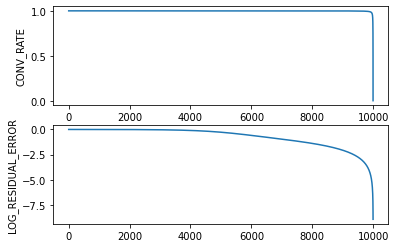

Fit time: 278.56399965286255, #SV: 1191
SUM OF eps-LOSS: 27385.776630158718
DEVSET MEE: 3.488817035545498


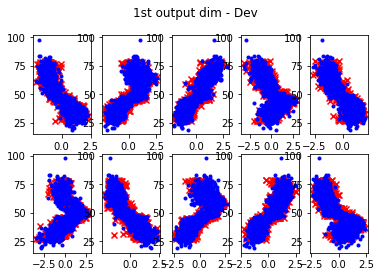

Testing the model
SUM OF eps-LOSS: 6411.944906203667
TEST MEE: 3.486544021826029


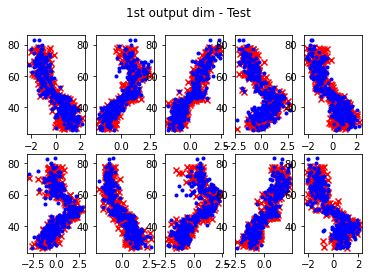

In [35]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


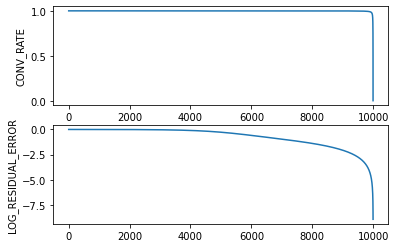

Fit time: 275.84299874305725, #SV: 1191
SUM OF eps-LOSS: 27385.776630154112
DEVSET MEE: 3.48881703554523


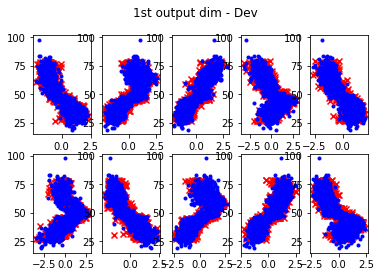

Testing the model
SUM OF eps-LOSS: 6411.94490620259
TEST MEE: 3.4865440218257877


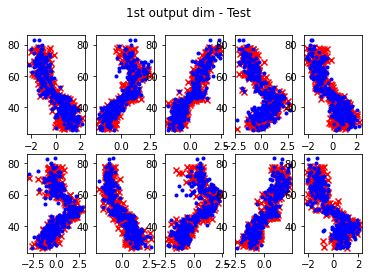

In [36]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [37]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

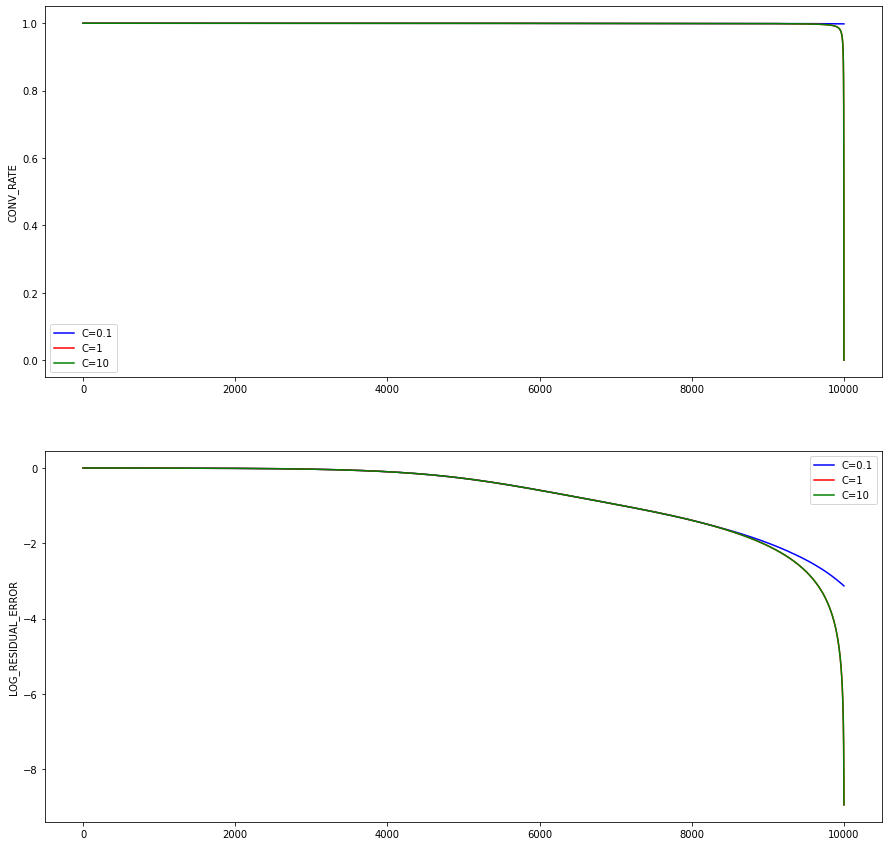

In [38]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_05_0, poly_05_1, poly_05_2 = cup_model, cup_model, cup_model2

In [39]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-429.84275169462427,
 -449.4478517481499,
 -449.44785174831526,
 array([0.89919999, 0.90167665, 0.90167665]))

# SIGMOID

Training first model ... 


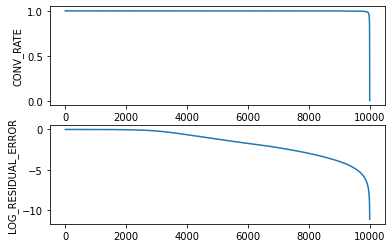

Fit time: 271.0449993610382, #SV: 1204
SUM OF eps-LOSS: 41483.41875076604
DEVSET MEE: 4.578218005625301


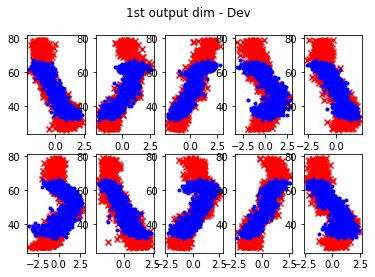

Testing the model
SUM OF eps-LOSS: 10124.246482917662
TEST MEE: 4.613346124445864


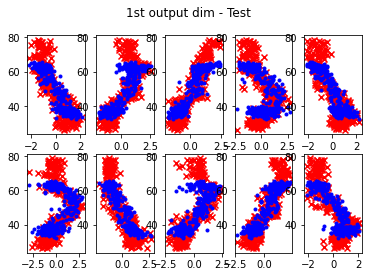

In [40]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


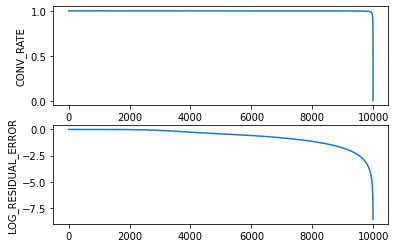

Fit time: 277.74799966812134, #SV: 1214
SUM OF eps-LOSS: 25731.251018492447
DEVSET MEE: 3.8227692928414405


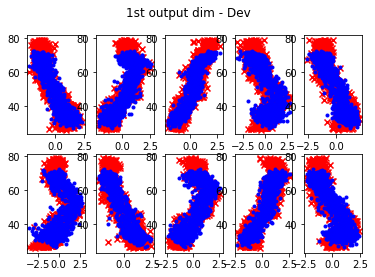

Testing the model
SUM OF eps-LOSS: 6706.104747615469
TEST MEE: 3.95542957480304


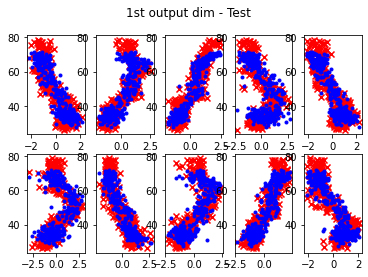

In [41]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


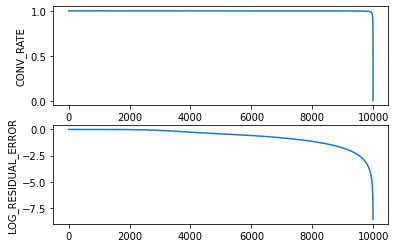

Fit time: 275.34699988365173, #SV: 1214
SUM OF eps-LOSS: 25731.251018493742
DEVSET MEE: 3.822769292841571


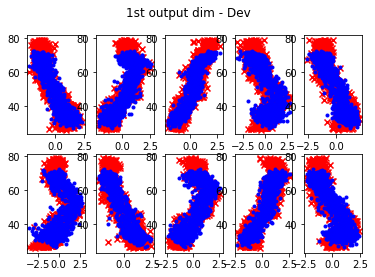

Testing the model
SUM OF eps-LOSS: 6706.104747615886
TEST MEE: 3.9554295748032198


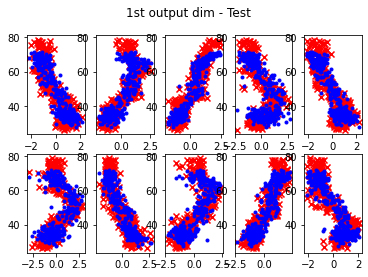

In [42]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [43]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

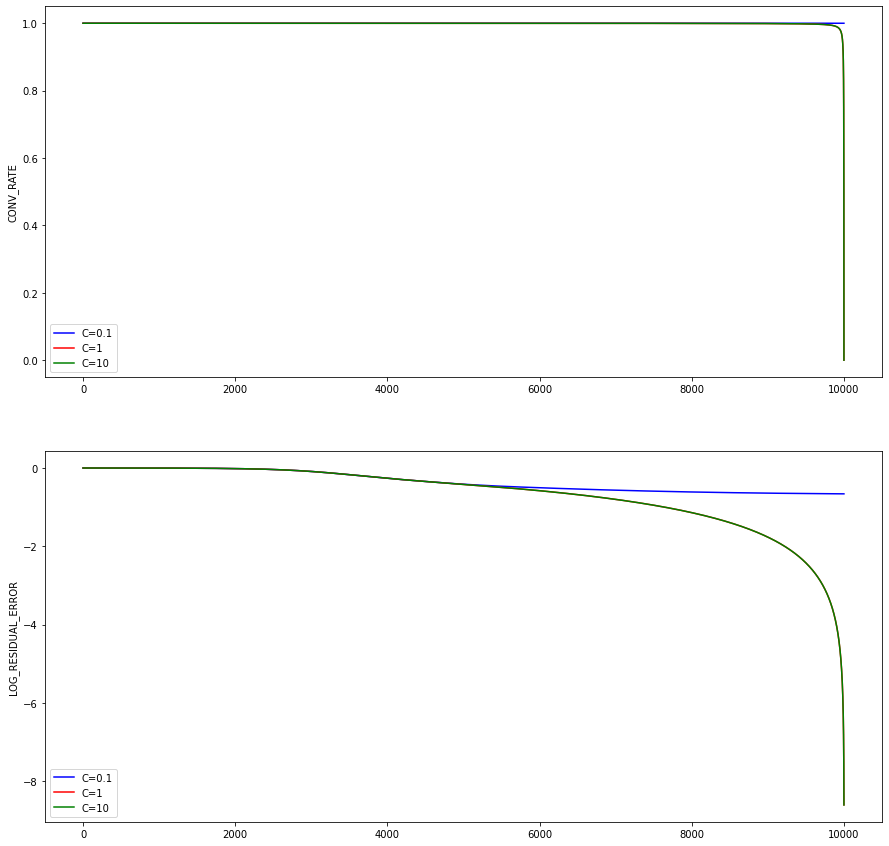

In [44]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_05_0, sig_05_1, sig_05_2 = cup_model, cup_model, cup_model2

In [45]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-680.9978433022319,
 -1409.9118733626603,
 -1409.9118733623632,
 array([0.84553016, 0.89688467, 0.89688467]))

# RBF

Training first model ... 


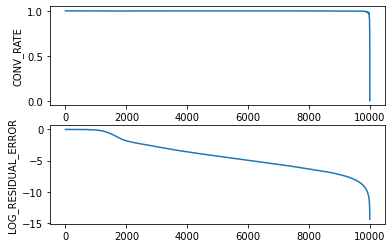

Fit time: 261.37600111961365, #SV: 1209
SUM OF eps-LOSS: 28729.469794068715
DEVSET MEE: 3.5855249262368543


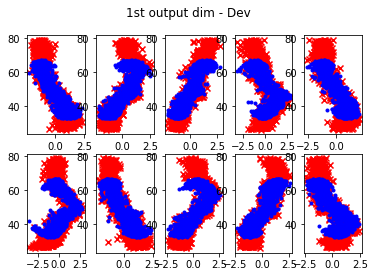

Testing the model
SUM OF eps-LOSS: 6802.393608078938
TEST MEE: 3.506260696049737


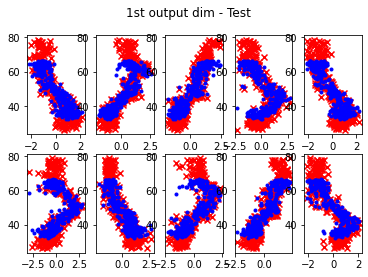

In [46]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


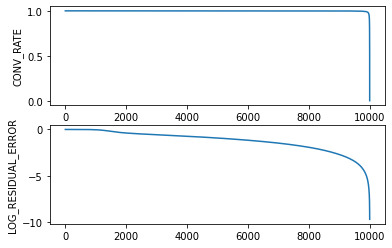

Fit time: 284.9670000076294, #SV: 1209
SUM OF eps-LOSS: 7076.405615647646
DEVSET MEE: 1.907046204526935


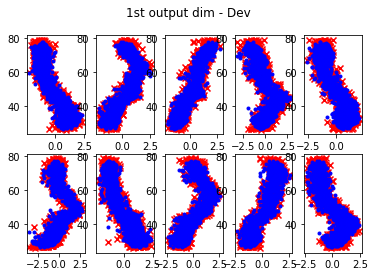

Testing the model
SUM OF eps-LOSS: 1978.4493119770027
TEST MEE: 1.9784439665771913


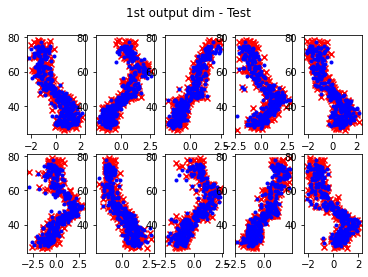

In [47]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


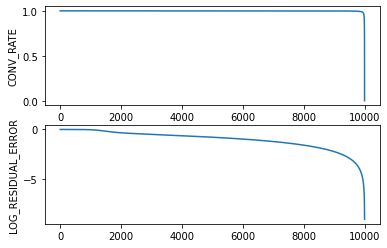

Fit time: 281.2073004245758, #SV: 1214
SUM OF eps-LOSS: 6746.525478503246
DEVSET MEE: 1.8800089127435464


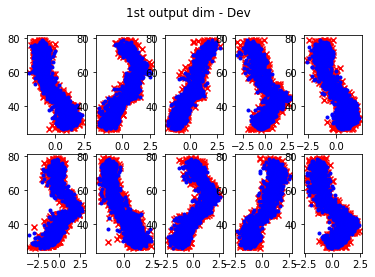

Testing the model
SUM OF eps-LOSS: 1956.6078186296268
TEST MEE: 1.975870324368622


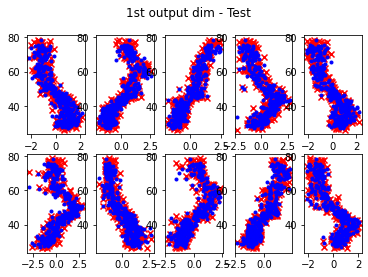

In [48]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [49]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

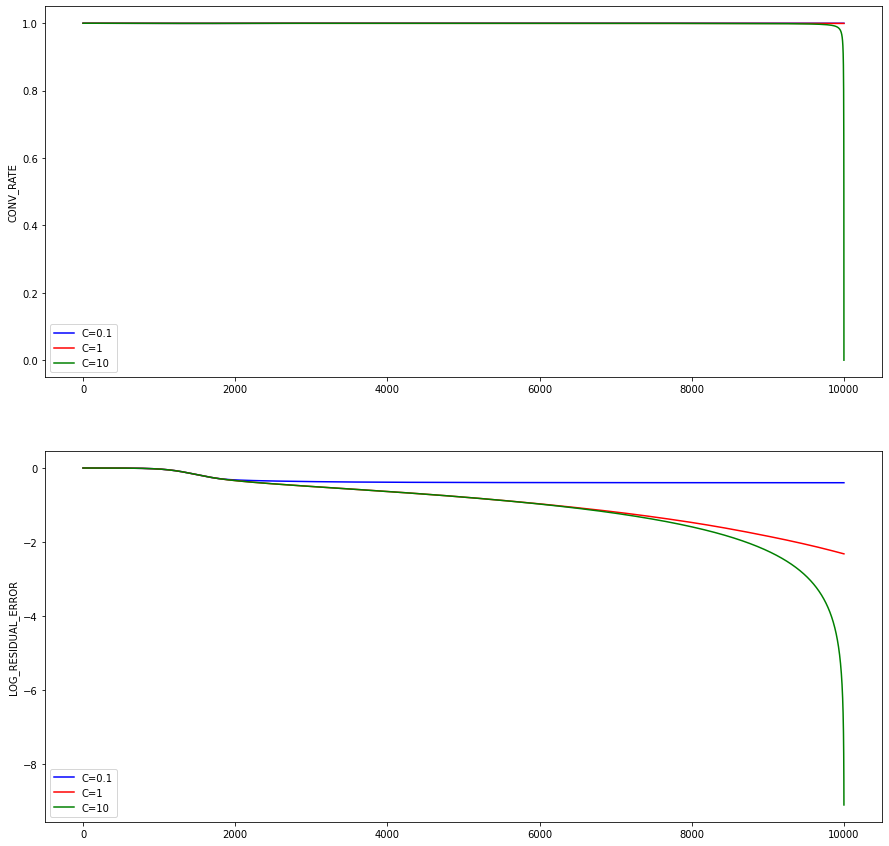

In [50]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_05_0, rbf_05_1, rbf_05_2 = cup_model, cup_model, cup_model2

In [51]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-715.0470781414542,
 -1965.1079115844852,
 -2178.72025288271,
 array([0.89586053, 0.96887694, 0.96920412]))

# EPS: 1.0

# LINEAR

Training first model ... 


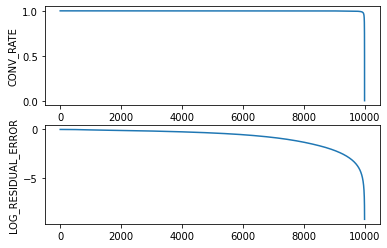

Fit time: 274.80358123779297, #SV: 1183
SUM OF eps-LOSS: 22080.976834858226
DEVSET MEE: 3.4823297449951713


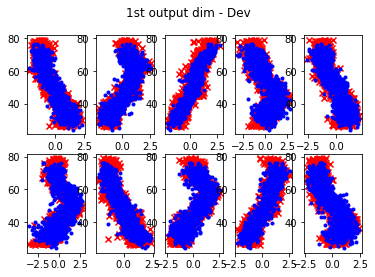

Testing the model
SUM OF eps-LOSS: 5731.651756204317
TEST MEE: 3.5886085426012193


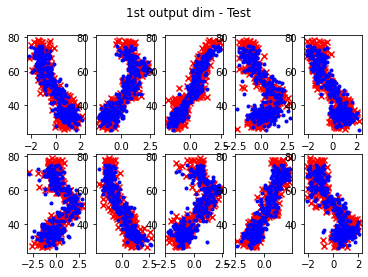

In [52]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


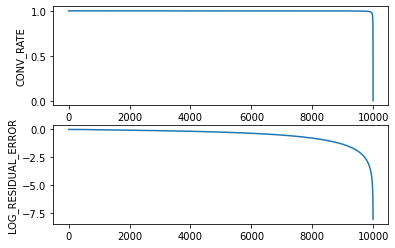

Fit time: 279.59929943084717, #SV: 1188
SUM OF eps-LOSS: 21939.924020036255
DEVSET MEE: 3.474832291362215


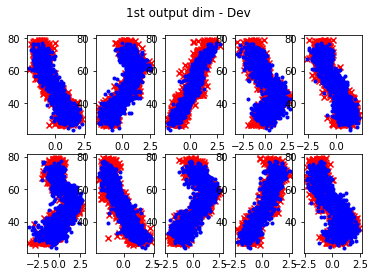

Testing the model
SUM OF eps-LOSS: 5790.291814662138
TEST MEE: 3.599998755622869


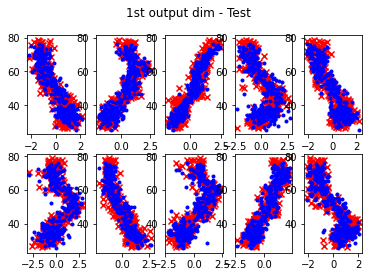

In [53]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


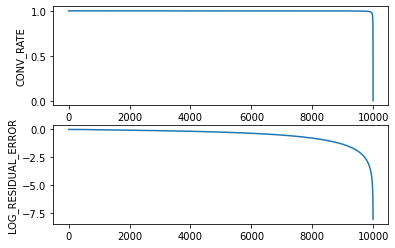

Fit time: 293.275639295578, #SV: 1188
SUM OF eps-LOSS: 21939.92402003645
DEVSET MEE: 3.474832291362215


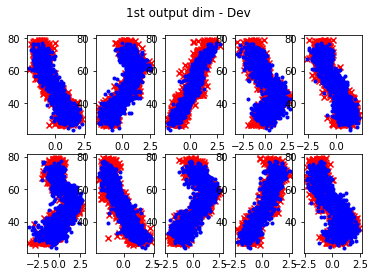

Testing the model
SUM OF eps-LOSS: 5790.2918146620605
TEST MEE: 3.599998755622801


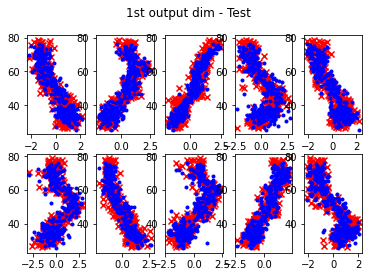

In [54]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [55]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

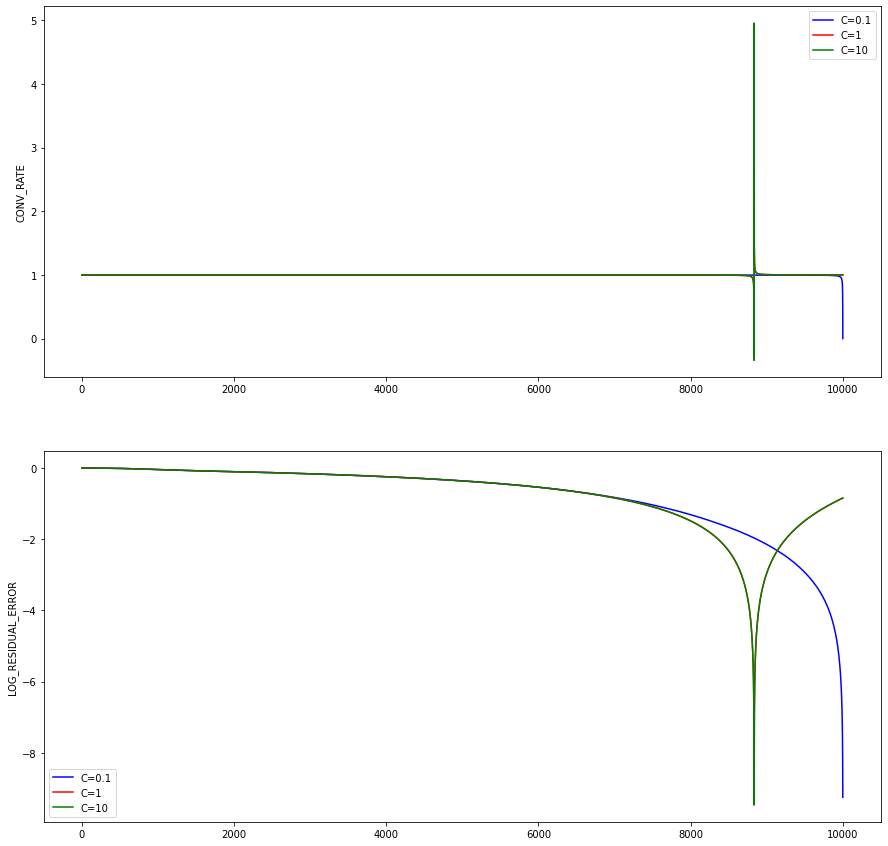

In [56]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

lin_10_0, lin_10_1, lin_10_2 = cup_model, cup_model, cup_model2

In [57]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-280.82973920402895,
 -401.92066405597893,
 -401.92066405599894,
 array([0.91168737, 0.91080616, 0.91080616]))

# POLY

Training first model ... 


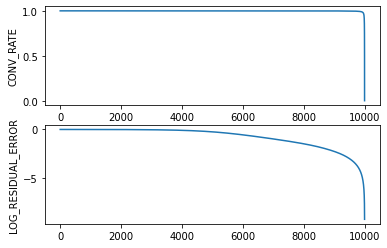

Fit time: 294.54778957366943, #SV: 1183
SUM OF eps-LOSS: 29455.168987791494
DEVSET MEE: 3.6468773332022346


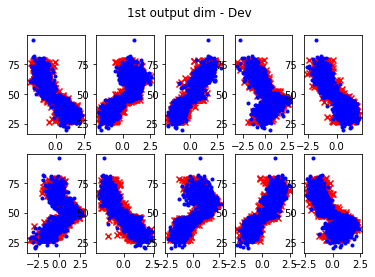

Testing the model
SUM OF eps-LOSS: 6924.708951396395
TEST MEE: 3.605670361395511


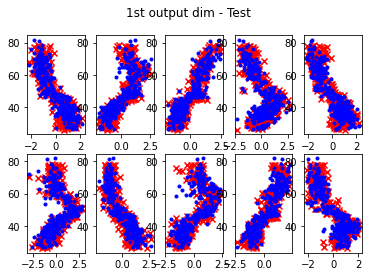

In [58]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


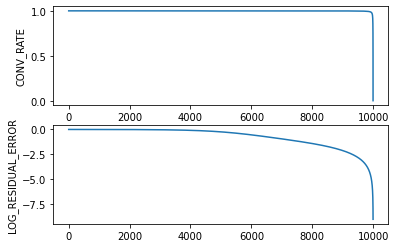

Fit time: 299.01244354248047, #SV: 1186
SUM OF eps-LOSS: 28979.750755575693
DEVSET MEE: 3.6156218401689277


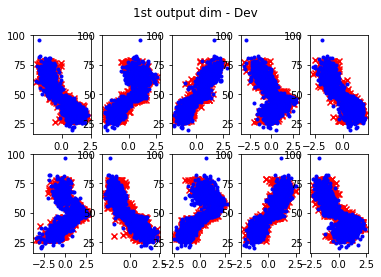

Testing the model
SUM OF eps-LOSS: 6816.988159730767
TEST MEE: 3.5845594956690494


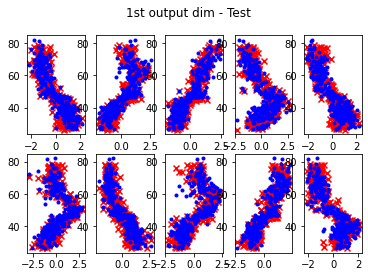

In [59]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


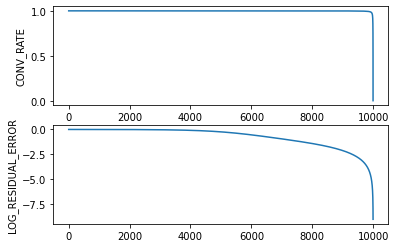

Fit time: 298.2488121986389, #SV: 1186
SUM OF eps-LOSS: 28979.75075557789
DEVSET MEE: 3.6156218401690494


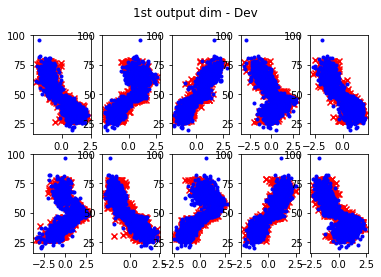

Testing the model
SUM OF eps-LOSS: 6816.9881597313315
TEST MEE: 3.584559495669177


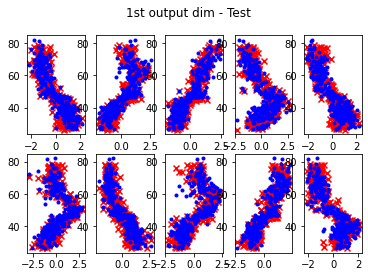

In [60]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [61]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

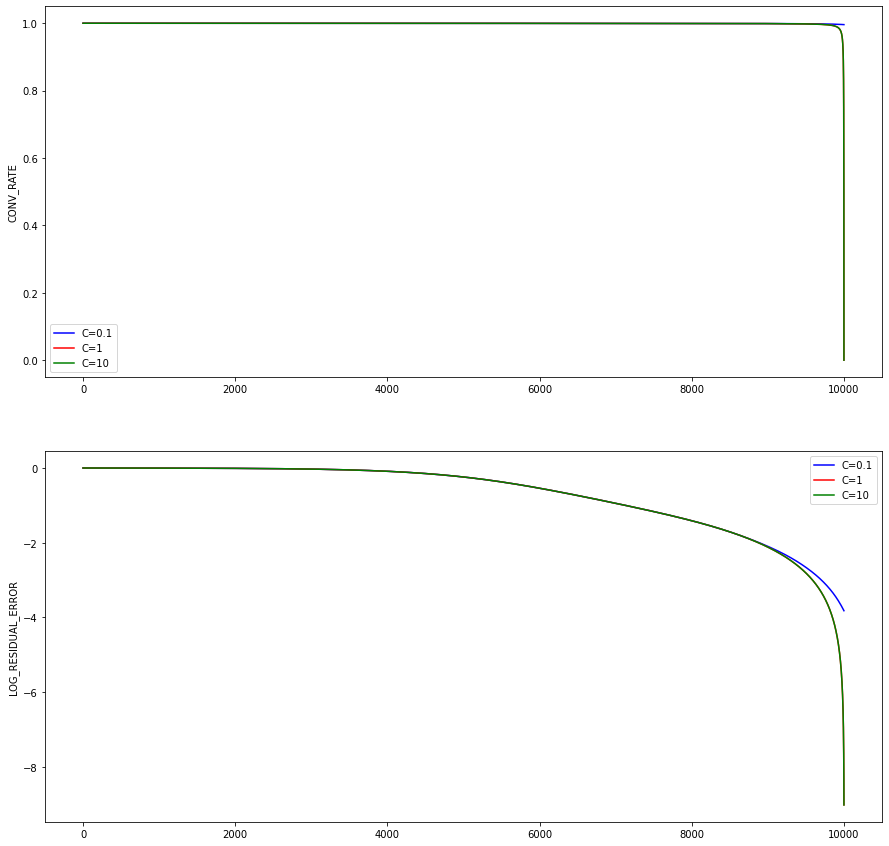

In [62]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

poly_10_0, poly_10_1, poly_10_2 = cup_model, cup_model, cup_model2

In [63]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-385.4880621104334,
 -394.0914827855999,
 -394.09148278547974,
 array([0.89395449, 0.89557323, 0.89557323]))

# SIGMOID

Training first model ... 


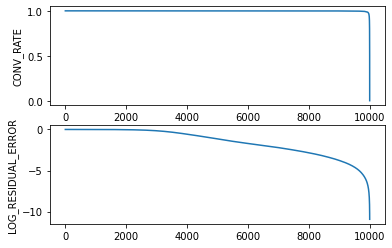

Fit time: 294.00953245162964, #SV: 1195
SUM OF eps-LOSS: 41090.7057229216
DEVSET MEE: 4.571112131082266


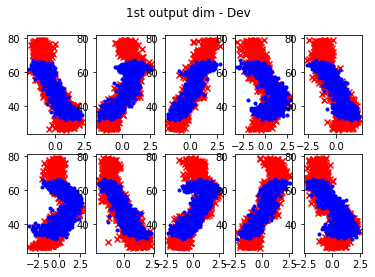

Testing the model
SUM OF eps-LOSS: 10057.416456294832
TEST MEE: 4.60909280006629


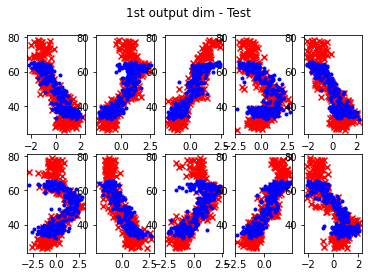

In [64]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


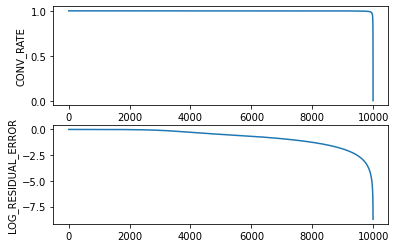

Fit time: 292.1085457801819, #SV: 1211
SUM OF eps-LOSS: 26881.282732719817
DEVSET MEE: 3.909359520747678


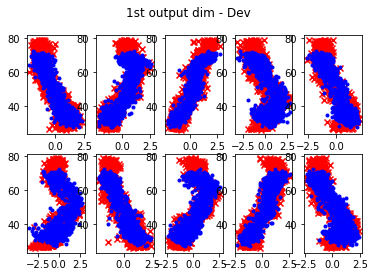

Testing the model
SUM OF eps-LOSS: 7022.477658673504
TEST MEE: 4.068748268901444


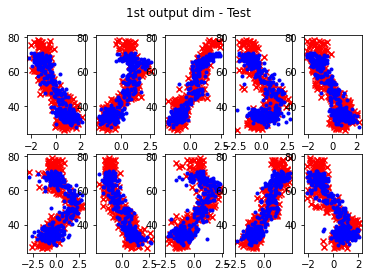

In [65]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


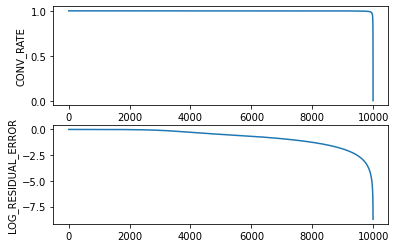

Fit time: 279.1920258998871, #SV: 1211
SUM OF eps-LOSS: 26881.282732720483
DEVSET MEE: 3.909359520747702


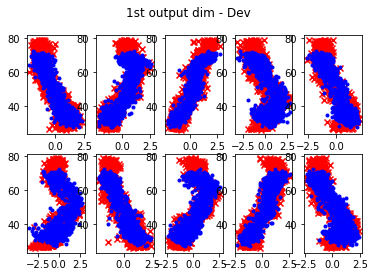

Testing the model
SUM OF eps-LOSS: 7022.477658673631
TEST MEE: 4.06874826890146


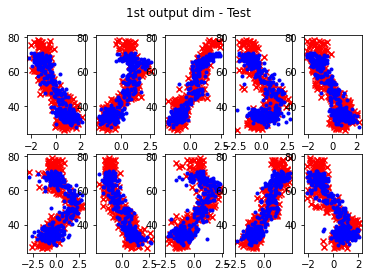

In [66]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [67]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

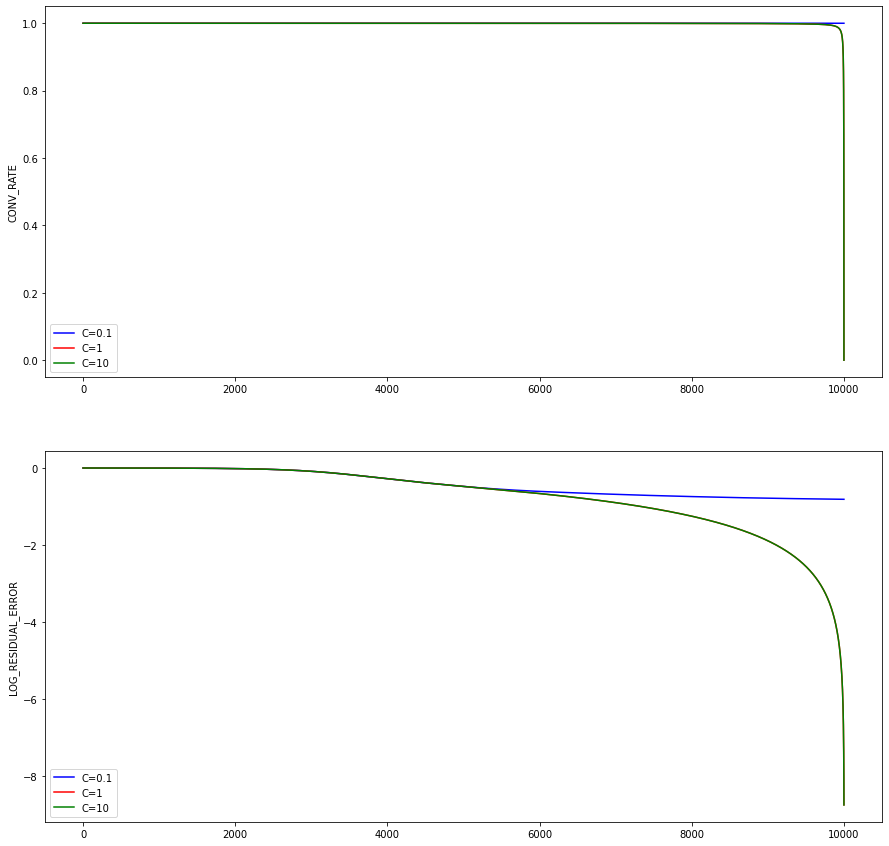

In [68]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

sig_10_0, sig_10_1, sig_10_2 = cup_model, cup_model, cup_model2

In [69]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-621.6568795309976,
 -1118.3395249369494,
 -1118.339524936791,
 array([0.84652635, 0.89208434, 0.89208434]))

# RBF

Training first model ... 


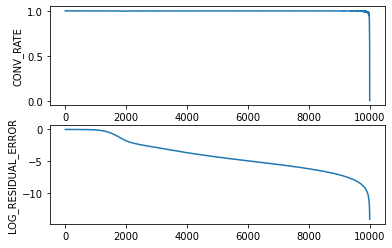

Fit time: 273.6800000667572, #SV: 1201
SUM OF eps-LOSS: 28973.569493790063
DEVSET MEE: 3.6085869370183064


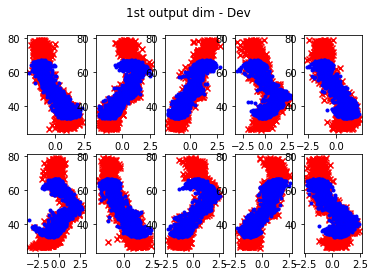

Testing the model
SUM OF eps-LOSS: 6867.46743517168
TEST MEE: 3.5277078457802156


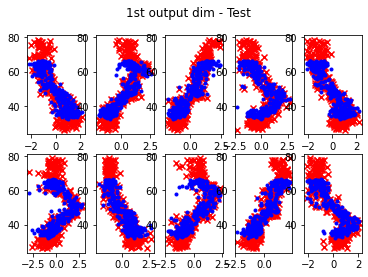

In [70]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


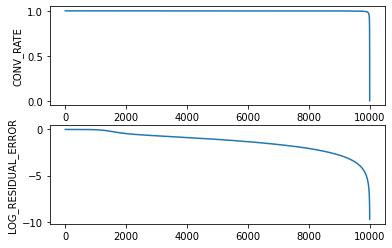

Fit time: 293.41899824142456, #SV: 1211
SUM OF eps-LOSS: 7366.485715254419
DEVSET MEE: 1.956310173238949


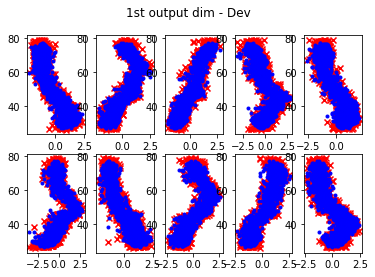

Testing the model
SUM OF eps-LOSS: 2046.7737693794168
TEST MEE: 2.0208899267549554


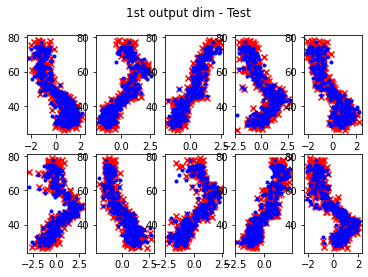

In [71]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


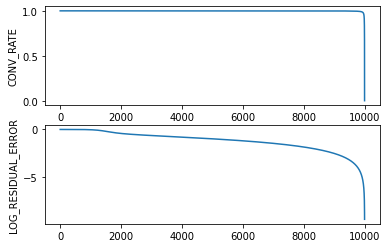

Fit time: 275.0389976501465, #SV: 1209
SUM OF eps-LOSS: 7128.334899817095
DEVSET MEE: 1.9342627368129202


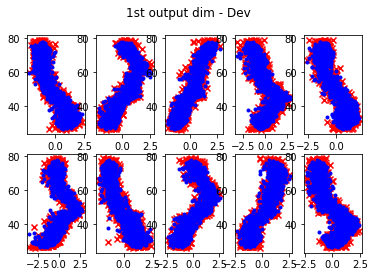

Testing the model
SUM OF eps-LOSS: 2023.3332234888278
TEST MEE: 2.009323586694507


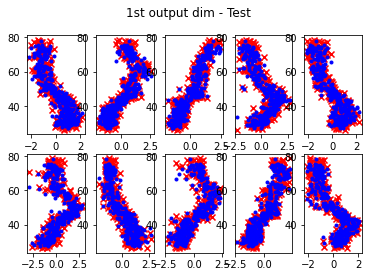

In [72]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 1.0}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [73]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

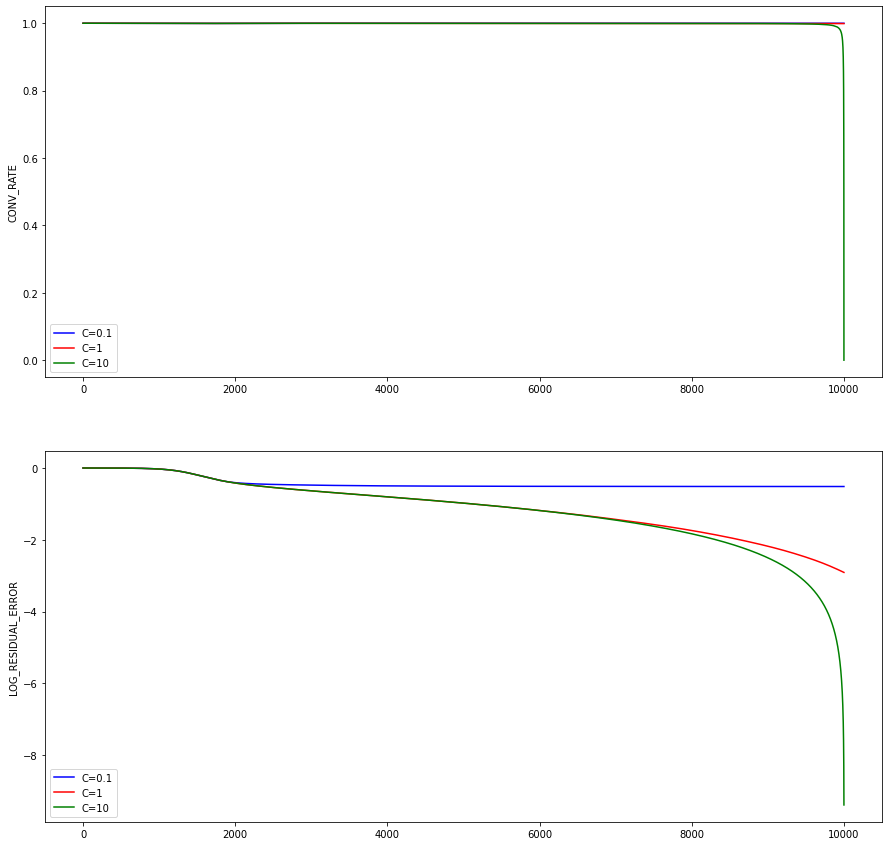

In [74]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
#     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
axs[0].legend(['C=0.1','C=1', 'C=10'])
plt.legend()
plt.show()

rbf_10_0, rbf_10_1, rbf_10_2 = cup_model, cup_model, cup_model2

In [75]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-664.6126119760843,
 -1560.122392794278,
 -1650.0012058304883,
 array([0.89487481, 0.96782438, 0.96818306]))

# SAVING EVERY MODEL

In [76]:
with open("1e4_models", "wb") as f:
    pickle.dump({"lin1": lin_01_0, "lin2": lin_01_1, "lin3": lin_01_2, "lin4": lin_05_0, "lin5": lin_05_1, "lin6": lin_05_2, "lin7": lin_10_0, "lin8": lin_10_1, "lin9": lin_10_2, "poly1": poly_01_0, "poly2": poly_01_1, "poly3": poly_01_2, "poly4": poly_05_0, "poly5": poly_05_1, "poly6": poly_05_2, "poly7": poly_10_0, "poly8": poly_10_1, "poly9": poly_10_2, "sig1": sig_01_0, "sig2": sig_01_1, "sig3": sig_01_2, "sig4": sig_05_0, "sig5": sig_05_1, "sig6": sig_05_2, "sig7": sig_10_0, "sig8": sig_10_1, "sig9": sig_10_2, "rbf1": rbf_01_0, "rbf2": rbf_01_1, "rbf3": rbf_01_2, "rbf4": rbf_05_0, "rbf5": rbf_05_1, "rbf6": rbf_05_2, "rbf7": rbf_10_0, "rbf8": rbf_10_1, "rbf9": rbf_10_2}, f, protocol=pickle.HIGHEST_PROTOCOL)

### PLOTTING LINEAR STUFF

In [3]:
from sklearn.metrics import r2_score
d = {}
with open("1e4_models", "rb") as f:
    d = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '1e4_models'

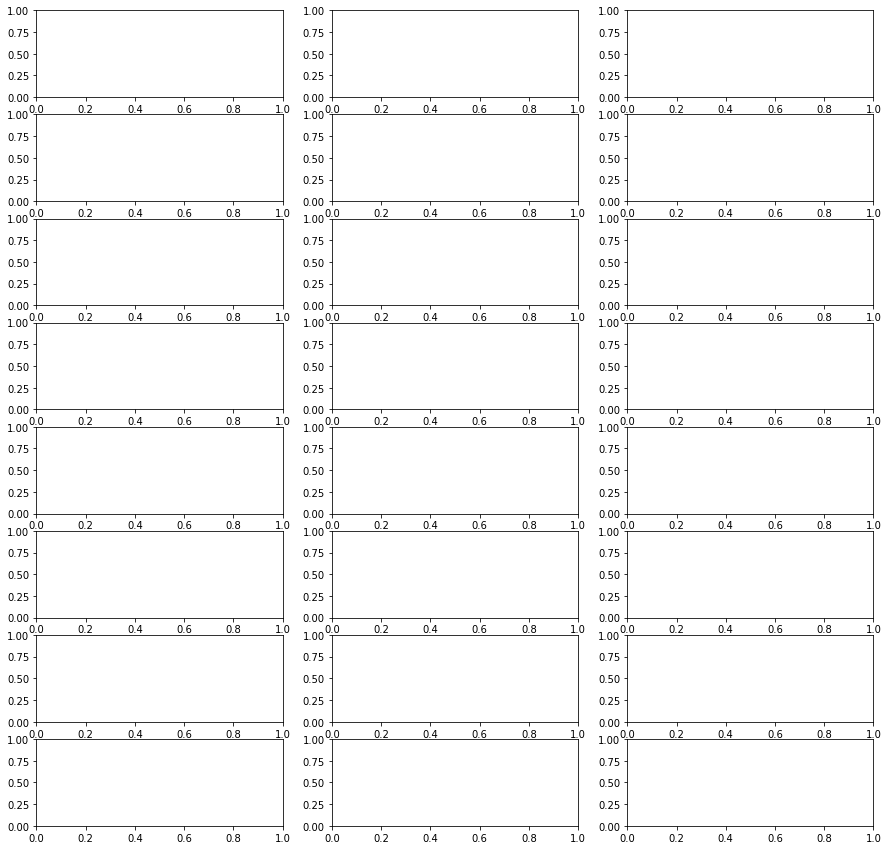

In [12]:
fig, axs = plt.subplots(8,3, figsize=(15,15))

No handles with labels found to put in legend.


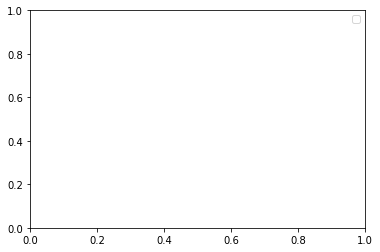

In [8]:
def plot_row(row, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8, test=test, test_out1=test_out1, fig=fig, axs=axs):
    testpred_model_0 = [float(cup_model_0.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_1 = [float(cup_model_1.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_2 = [float(cup_model_2.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_3 = [float(cup_model_3.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_4 = [float(cup_model_4.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_5 = [float(cup_model_5.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_6 = [float(cup_model_6.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_7 = [float(cup_model_7.predict(test[i])) for i in range(test.shape[0])]
    testpred_model_8 = [float(cup_model_8.predict(test[i])) for i in range(test.shape[0])]
    rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2), r2_score(test_out1, testpred_model_3), r2_score(test_out1, testpred_model_4), r2_score(test_out1, testpred_model_5), r2_score(test_out1, testpred_model_6), r2_score(test_out1, testpred_model_7), r2_score(test_out1, testpred_model_8)])
    fstar = cup_model_0.history['fstar'] if np.argmax(rscores) == 0 else cup_model_1.history['fstar'] if np.argmax(rscores) == 1 else cup_model_2.history['fstar'] if np.argmax(rscores) == 2 else cup_model_3.history['fstar'] if np.argmax(rscores) == 3 else cup_model_4.history['fstar'] if np.argmax(rscores) == 4 else cup_model_5.history['fstar'] if np.argmax(rscores) == 5 else cup_model_6.history['fstar'] if np.argmax(rscores) == 6 else cup_model_7.history['fstar'] if np.argmax(rscores) == 7 else cup_model_8.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_0, cup_model_1, cup_model_2
    column = 0

    colors = ['blue', 'red', 'green']
    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 0.1')


    #----------------------------------------------------------------------#

    # testpred_model_0 = [float(cup_model_3.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_1 = [float(cup_model_4.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_2 = [float(cup_model_5.predict(test[i])) for i in range(test.shape[0])]
    # rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])
    # fstar = cup_model_3.history['fstar'] if np.argmax(rscores) == 0 else cup_model_4.history['fstar'] if np.argmax(rscores) == 1 else cup_model_5.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_3, cup_model_4, cup_model_5
    column = 1


    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 0.5')


    #----------------------------------------------------------------------#

    # testpred_model_0 = [float(cup_model_6.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_1 = [float(cup_model_7.predict(test[i])) for i in range(test.shape[0])]
    # testpred_model_2 = [float(cup_model_8.predict(test[i])) for i in range(test.shape[0])]
    # rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])
    # fstar = cup_model_6.history['fstar'] if np.argmax(rscores) == 0 else cup_model_7.history['fstar'] if np.argmax(rscores) == 1 else cup_model_8.history['fstar']
    cup_model, cup_model1, cup_model2 = cup_model_6, cup_model_7, cup_model_8
    column = 2


    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
    #     plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model1.history['f']) - 1):
        plot_conv_rate.append((cup_model1.history['f'][i+1] - fstar) / (cup_model1.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")

    plot_conv_rate = []
    log_residual_error = []
    for i in range(len(cup_model2.history['f']) - 1):
        plot_conv_rate.append((cup_model2.history['f'][i+1] - fstar) / (cup_model2.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
    axs[row][column].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
    axs[row][column].set_ylabel("CONV_RATE")
    axs[row+1][column].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
    axs[row+1][column].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[row][column].legend(['C=0.1','C=1', 'C=10'])
    axs[row][column].set_title('eps: 1.0')

In [ ]:
cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["lin1"], d["lin2"], d["lin3"], d["lin4"], d["lin5"], d["lin6"], d["lin7"], d["lin8"], d["lin9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["poly1"], d["poly2"], d["poly3"], d["poly4"], d["poly5"], d["poly6"], d["poly7"], d["poly8"], d["poly9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["sig1"], d["sig2"], d["sig3"], d["sig4"], d["sig5"], d["sig6"], d["sig7"], d["sig8"], d["sig9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)

cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8 = d["rbf1"], d["rbf2"], d["rbf3"], d["rbf4"], d["rbf5"], d["rbf6"], d["rbf7"], d["rbf8"], d["rbf9"]
plot_row(0, cup_model_0, cup_model_1, cup_model_2, cup_model_3, cup_model_4, cup_model_5, cup_model_6, cup_model_7, cup_model_8)


plt.legend()
plt.show()